In [2]:
import pyspark
from pyspark.sql import SparkSession

# Create a Spark session (Control center of Spark functionality)
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()
spark.conf.set("spark.sql.shuffle.partitions", "5")

# Structured API Overview


Use to manipulate data, from unstructured log files, semi-structured CSV files and structured Parquet files.

Three core types of collection APIs:

- Datasets
- DataFRames
- SQL Tables and Views


## DataFrames and Datasets

They are table-like collections of rows and columns.

In Spark they are immutable, lazy evaluated plans that specify what operations to apply to data to generate some output.

When we perform an action on a DataFrame, we instruct Spark to perform the actual transformations and return the result.


## Schemas

Defines the column names and types of a DataFrame. We can define the manually or read a schema from a data source.


## Overview of Structured Spark Types

Spark uses it's own engine called Catalyst

Even if we use Spark with Python, the majority of manipulations will operate on Spark Type not Python Type


In [10]:
# Example: this code does not perform addition in Python, it does it purely on Spark

df = spark.range(10).toDF("number")
df.select(df["number"] + 10)
df.select(df["number"] + 10).show()

df.select(df["number"] + 10).explain()


+-------------+
|(number + 10)|
+-------------+
|           10|
|           11|
|           12|
|           13|
|           14|
|           15|
|           16|
|           17|
|           18|
|           19|
+-------------+

== Physical Plan ==
*(1) Project [(id#30L + 10) AS (number + 10)#38L]
+- *(1) Range (0, 10, step=1, splits=8)




## DataFrames vs Datasets

DataFrame → untyped, schema-based, SQL-style API

Dataset → typed, compile-time–safe API (Scala/Java only)

When using DataFrames we are are taking advantage of Spark's optimized internal format


## Columns

Simple type like an integer or a string, a complex type like an array or map, or a NULL value

Spark columns -> like columns in a table


## Rows

Record of data. Each record in a DataFrame must be of type **Row**


In [11]:
# returns an array Row object
spark.range(2).collect()

[Row(id=0), Row(id=1)]

## Spark Types

| Spark SQL Data Type | Python Value Type                    | How to Access / Create                                                                           |
| ------------------- | ------------------------------------ | ------------------------------------------------------------------------------------------------ |
| **ByteType**        | `int` or `long`                      | `ByteType()`<br>⚠ Values converted to 1-byte signed integers at runtime (–128 to 127)            |
| **ShortType**       | `int` or `long`                      | `ShortType()`<br>⚠ Values converted to 2-byte signed integers at runtime (–32768 to 32767)       |
| **IntegerType**     | `int` or `long`                      | `IntegerType()`<br>⚠ Large numbers rejected; prefer `LongType`                                   |
| **LongType**        | `long`                               | `LongType()`<br>⚠ Range: –9,223,372,036,854,775,808 to 9,223,372,036,854,775,807                 |
| **FloatType**       | `float`                              | `FloatType()`<br>⚠ 4-byte single-precision floating point                                        |
| **DoubleType**      | `float`                              | `DoubleType()`                                                                                   |
| **DecimalType**     | `decimal.Decimal`                    | `DecimalType()`                                                                                  |
| **StringType**      | `str`                                | `StringType()`                                                                                   |
| **BinaryType**      | `bytearray`                          | `BinaryType()`                                                                                   |
| **BooleanType**     | `bool`                               | `BooleanType()`                                                                                  |
| **TimestampType**   | `datetime.datetime`                  | `TimestampType()`                                                                                |
| **DateType**        | `datetime.date`                      | `DateType()`                                                                                     |
| **ArrayType**       | `list`, `tuple`, or `array`          | `ArrayType(elementType, containsNull=True)`                                                      |
| **MapType**         | `dict`                               | `MapType(keyType, valueType, valueContainsNull=True)`                                            |
| **StructType**      | `list` or `tuple`                    | `StructType(fields)`<br>⚠ `fields` must be a list of `StructField`s; duplicate names not allowed |
| **StructField**     | Python type matching field data type | `StructField(name, dataType, nullable=True)`                                                     |


## Overview of Structured API Execution

1. Write DataFrame/Dataset/SQL Code.
2. If valid code, Spark converts this to a Logical Plan.
3. Spark transforms this Logical Plan to a Physical Plan, checking for optimizations along
   the way.
4. Spark then executes this Physical Plan (RDD manipulations) on the cluster

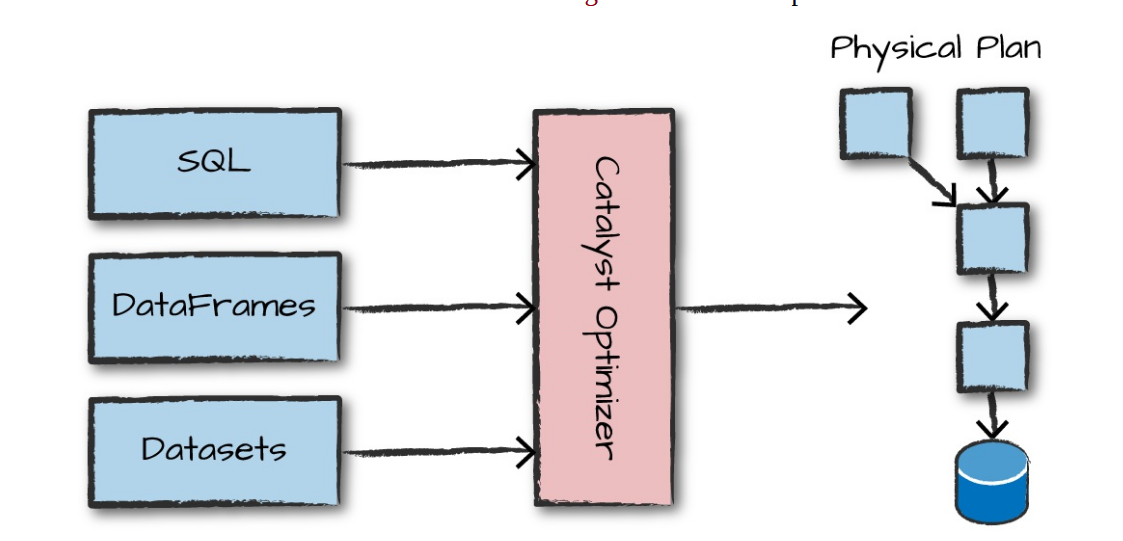

Logical Planning

The first phase of execution is meant to take user code and convert it into a logical plan.

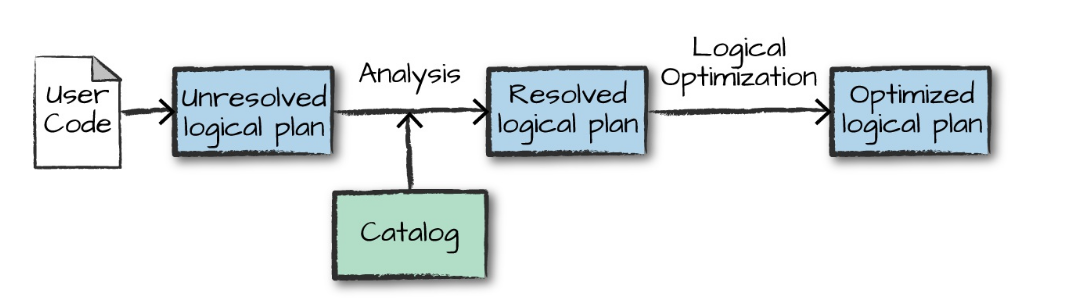

Physical Planning

After successfully creating an optimized logical plan, Spark then begins the physical planning process.

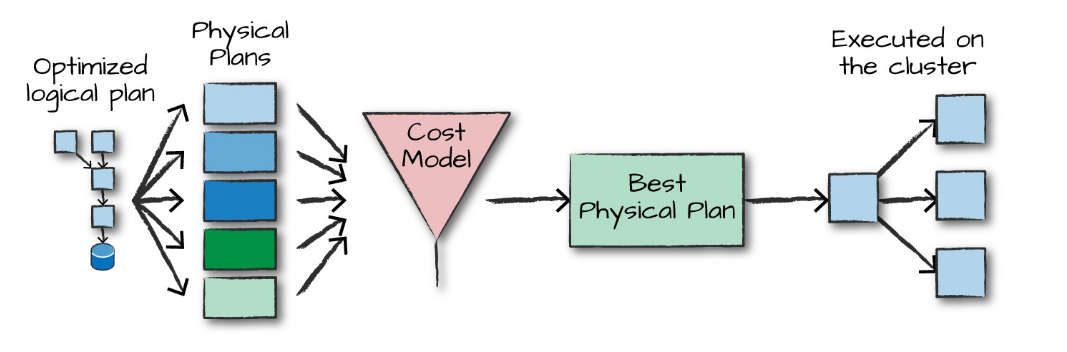

Execution


In [15]:
# Stop the Spark session - good practice to free up resources on low-RAM machines
spark.stop()